# PA 2: Classification - Decision Tree

## Student Details (1 Point)
Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

**Do not upload the database file. Only two files are expected** [-20 points]


## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Heart dataset from cardio_train.csv  [1 points]

### Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]

3) Print the class labels.  [2 points]


4) Split your dataset 75% for training, and 25% for testing the classifier.  [2 points]

In [ ]:
# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1) Load Heart dataset from cardio_train.csv [1 points]
cardio_train = pd.read_csv("cardio_train.csv", sep=";")
# 2) Create a dataframe and print the first and last five records of your dataset. [2 points]
print("Create a dataframe and print the first and last five records of your dataset")
print(cardio_train.head())
print(cardio_train.tail())
# 3) Print the class labels. [2 points]
print("Print the class labels")
print(cardio_train["cardio"].unique())
# 4) Split your dataset 75% for training, and 25% for testing the classifier. [2 points]
# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X = cardio_train.drop(columns=['cardio'])
y = cardio_train['cardio']
print(y.unique())
print("Before split the dataset")
print(X.shape)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
print("After split the dataset")
print(x_train.shape)
print(x_test.shape)

Create a dataframe and print the first and last five records of your dataset
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0   

# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]


4) Print the decision tree visualization with depth of 4, 5, 6.  [5 points]


## Gini

In [ ]:
# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
# create the classifer
# We can save the image and zoom in to look each node clearly.
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=4)
# train the classifer
clf.fit(x_train,y_train)
# predict the test dataset
y_test_pred = clf.predict(x_test)
# visualize the tree
plt.figure(figsize=(30,30))
features = cardio_train.columns
classes = ['0','1']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
# plot_confusion matrix prints the confusion matrix using heatmap
def plot_confusionmatrix(y_test_pred,y_test):
    cf = confusion_matrix(y_test_pred,y_test)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

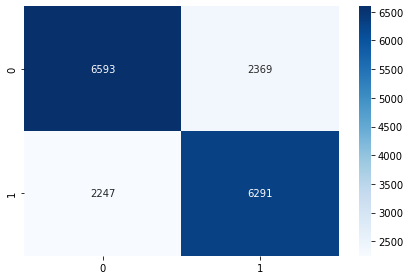

In [ ]:
plot_confusionmatrix(y_test_pred,y_test)

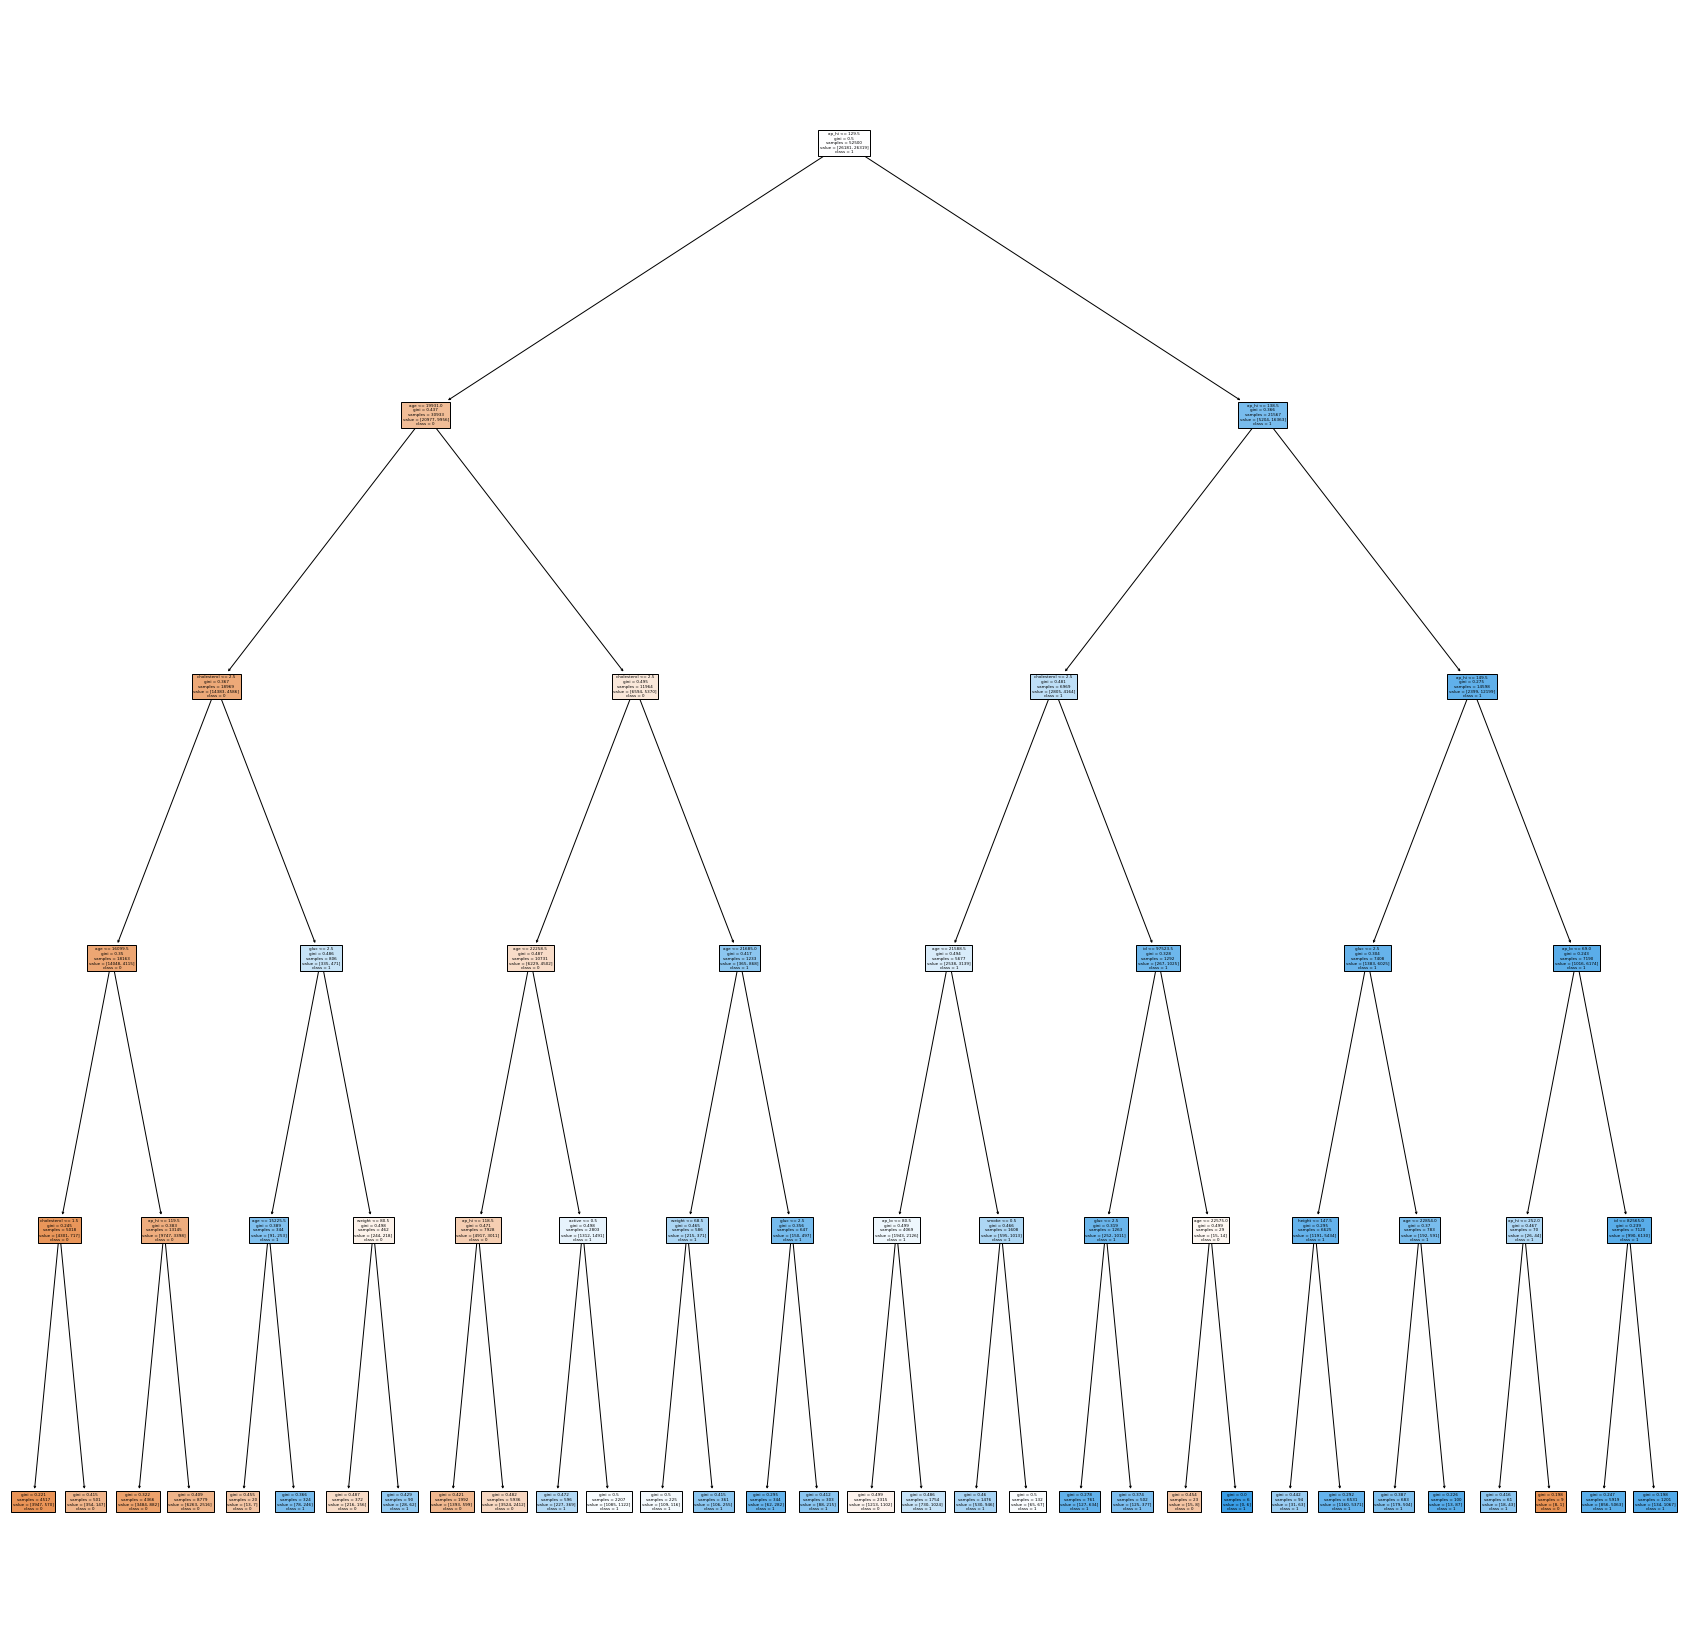

In [ ]:
# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
# create the classifer
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=5)
# train the classifer
clf.fit(x_train,y_train)
# predict the test dataset
y_test_pred = clf.predict(x_test)
# visualize the tree
plt.figure(figsize=(30,30))
features = cardio_train.columns
classes = ['0','1']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
plot_confusionmatrix(y_test_pred,y_test)

In [ ]:
# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
# create the classifer
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=6)
# train the classifer
clf.fit(x_train,y_train)
# predict the test dataset
y_test_pred = clf.predict(x_test)
# visualize the tree
plt.figure(figsize=(30,30))
features = cardio_train.columns
classes = ['0','1']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
plot_confusionmatrix(y_test_pred,y_test)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      8840
           1       0.77      0.68      0.72      8660

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500



## Entropy

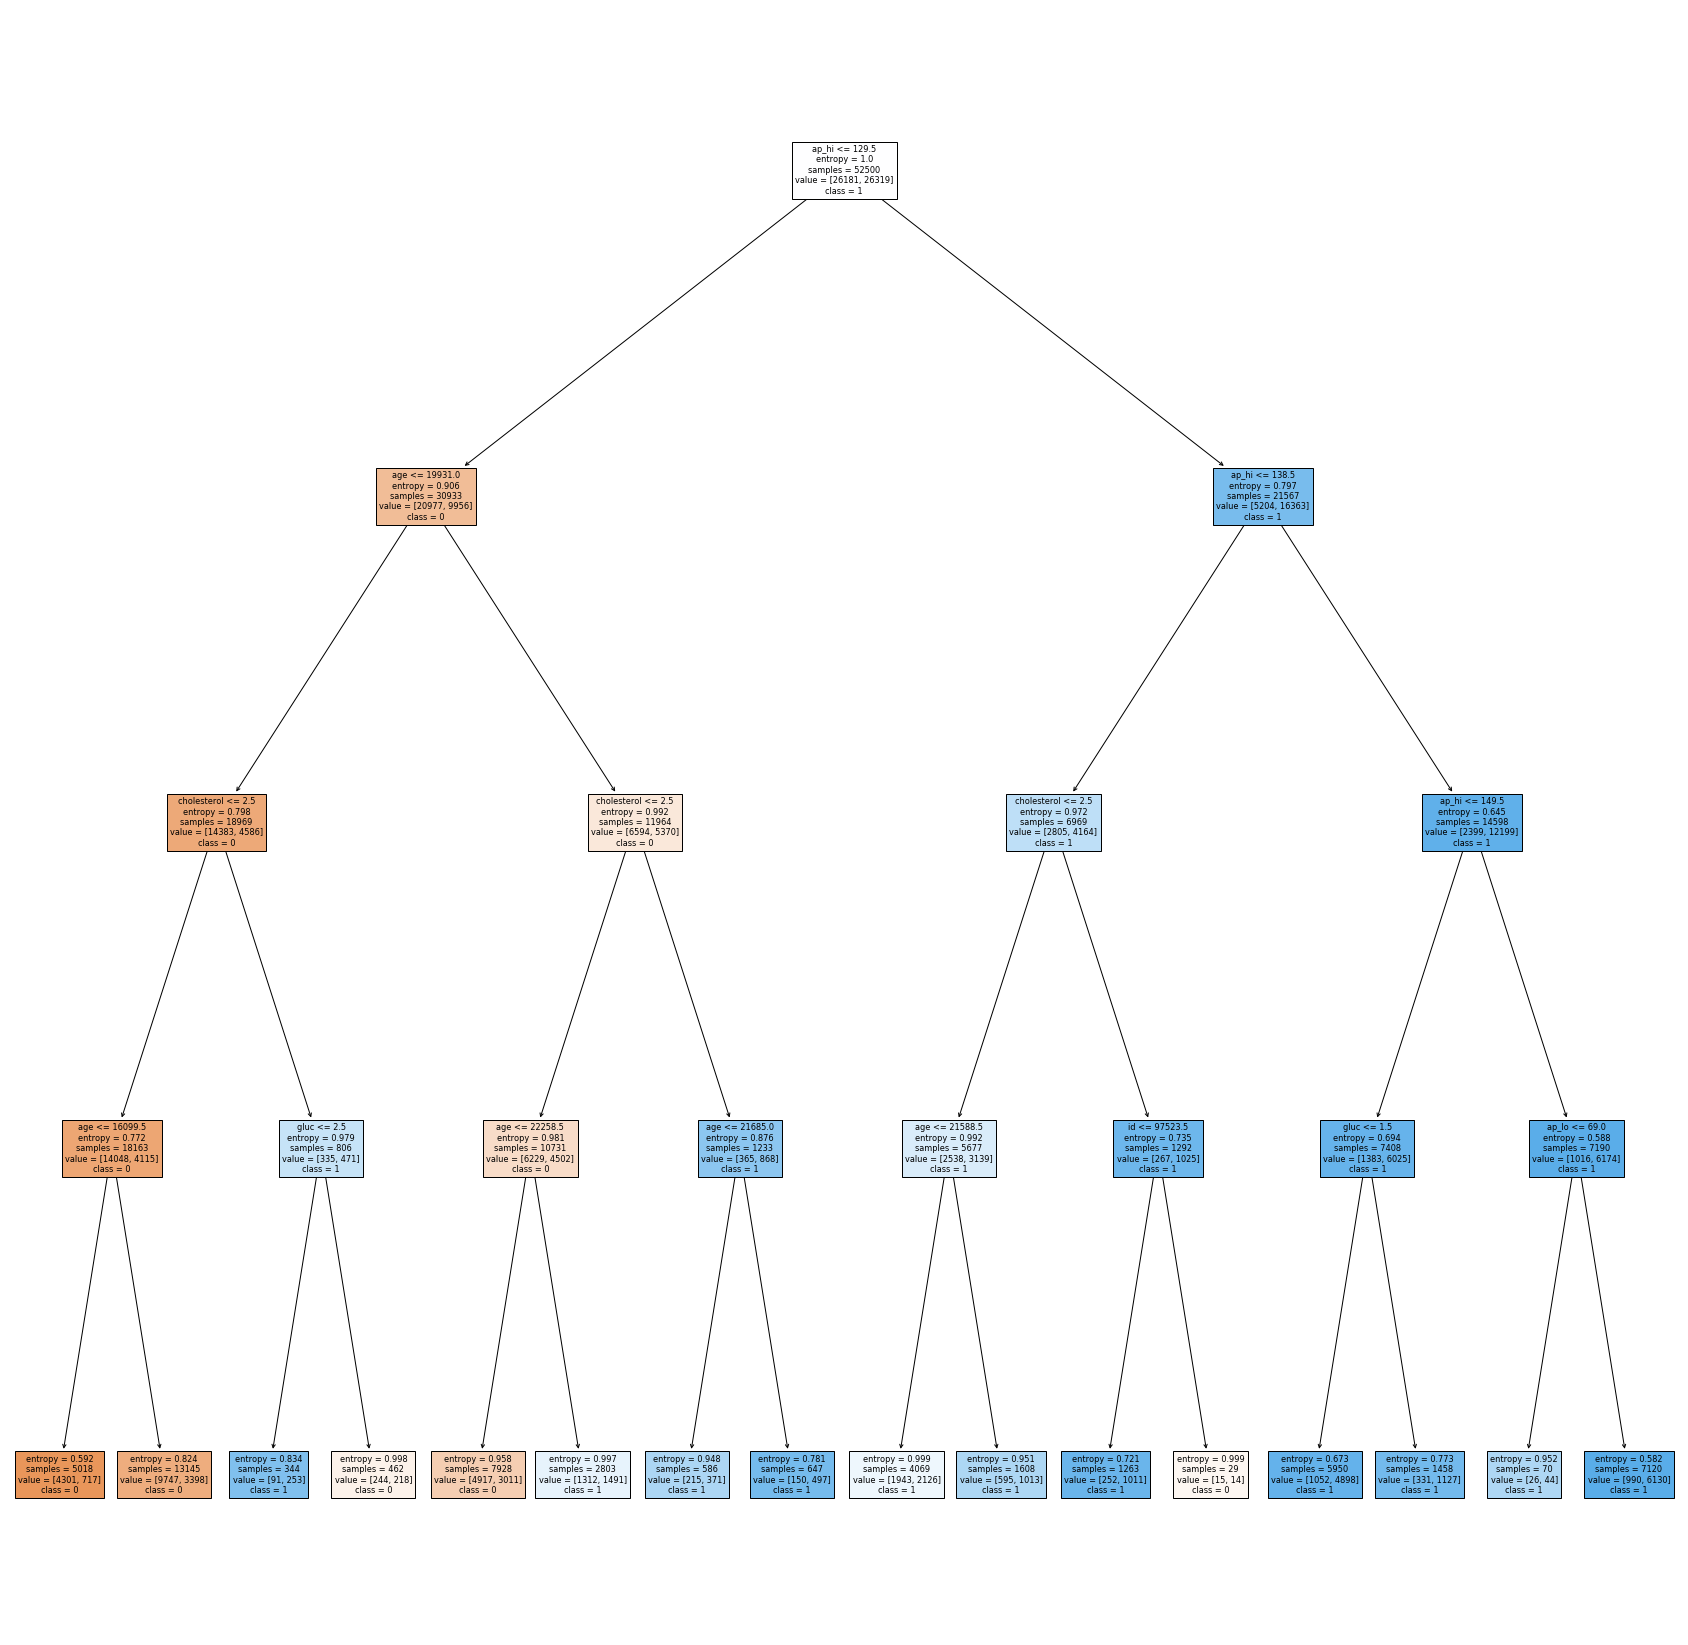

In [ ]:
# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
# create the classifer
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
# train the classifer
clf.fit(x_train,y_train)
# predict the test dataset
y_test_pred = clf.predict(x_test)
# visualize the tree
plt.figure(figsize=(30,30))
features = cardio_train.columns
classes = ['0','1']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

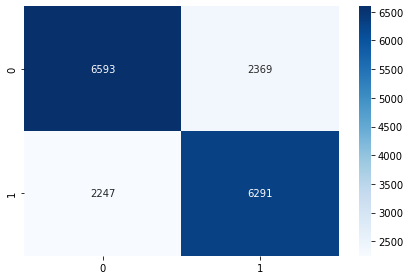

In [ ]:
plot_confusionmatrix(y_test_pred,y_test)

In [ ]:
# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
# create the classifer
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
# train the classifer
clf.fit(x_train,y_train)
# predict the test dataset
y_test_pred = clf.predict(x_test)
# visualize the tree
plt.figure(figsize=(30,30))
features = cardio_train.columns
classes = ['0','1']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

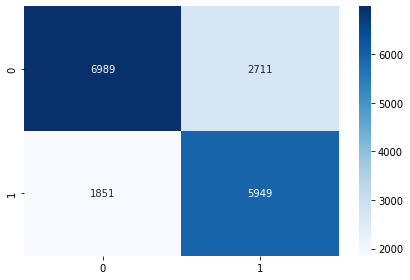

In [ ]:
plot_confusionmatrix(y_test_pred,y_test)

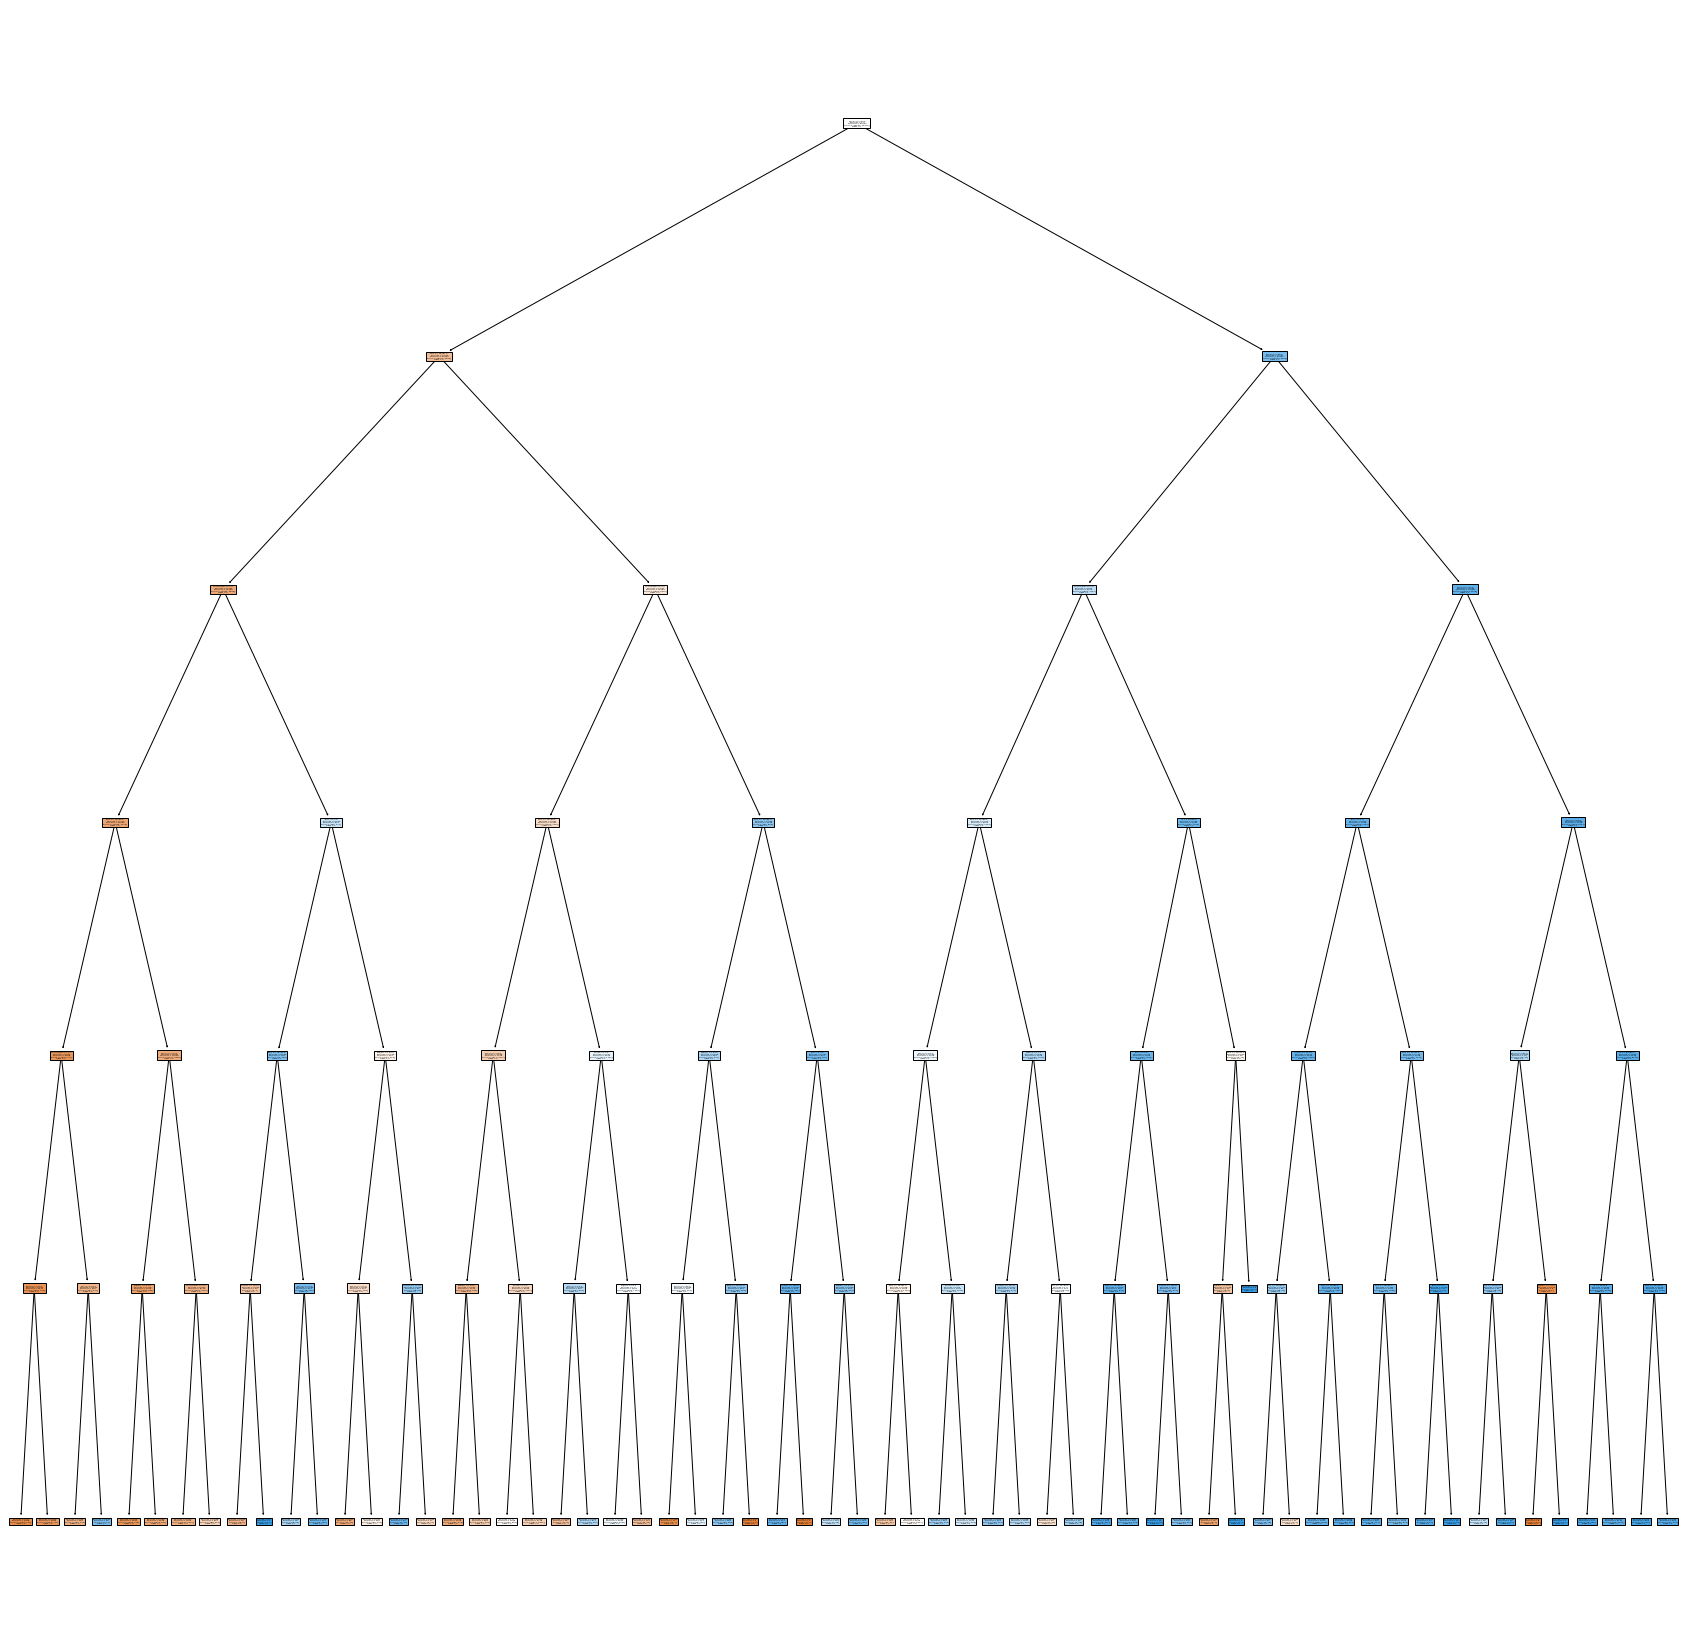

In [ ]:
# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
# create the classifer
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)
# train the classifer
clf.fit(x_train,y_train)
# predict the test dataset
y_test_pred = clf.predict(x_test)
# visualize the tree
plt.figure(figsize=(30,30))
features = cardio_train.columns
classes = ['0','1']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

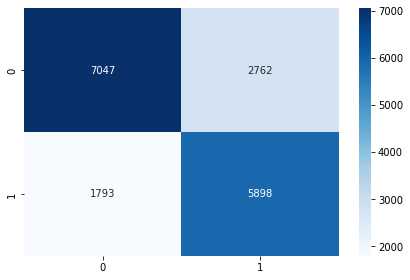

In [ ]:
plot_confusionmatrix(y_test_pred,y_test)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      8840
           1       0.77      0.68      0.72      8660

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500



# Naive Bayes (10 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]

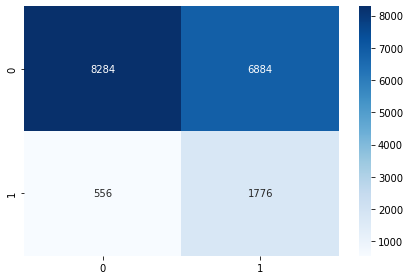

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.naive_bayes import GaussianNB
# create the classifer
clf = GaussianNB()
# train the classifer
clf.fit(x_train, y_train)
# predict the test dataset
y_test_pred = clf.predict(x_test)
plot_confusionmatrix(y_test_pred,y_test)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.55      0.94      0.69      8840
           1       0.76      0.21      0.32      8660

    accuracy                           0.57     17500
   macro avg       0.65      0.57      0.51     17500
weighted avg       0.65      0.57      0.51     17500



## Report (20 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]


2) Describe the datasets [3 points]  like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [2 points]


4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy. [1 points]

6) Compare the results of DT(gini), DT(entropy) and Naive Bayes. [2 points]

7) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!


## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

## Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own. [4 points]

### Decision Tree
- It is the supervised learning technique.
- Decision Tree is programatically nested if-else conditions.
- All the non leaf nodes contain decisions. Decision are highly interpretable
- The Decision trees recursively split features of attribute using the purity. It uses gini and entropy as the splitting criterion.
    - Entropy:
     -   If the distribution is close to uniform distribution then entropy is maximum.Given the random variables with K- classes ( in the above excercise cardio_train dataset has two classes cardio =1 or cardio =0), if all the class labels are equiprobable(unifrom distribution) then entropy is maximum.
    - Gini:
     -   Behaviour of Entropy and Gini is same but differs in scale. Gini is computationally efficient because gini uses squares of probabilities while entropy uses log probabilities. That is the reason Sklearn uses gini as criterion by default.
      
     - In particular, the Gini uses the simple probabilities. On the other hand, the entropy uses the log base 2 of the probabilities. In terms of the decision tree algorithms, the Gini uses CART, SLIP, and SPRINT and the entropy uses ID 3 and C4.5.    
     
### Naive Bayes classifier

  - It helps classify data. It uses the statistical probability of the feature to predict tasks. In the Naive Bayes, the assumption is that the features are independent of each other and there is no correlation between features. However, in real life, it is not possible.
 

## Describe the datasets [3 points] like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [2 points]

- The dataset contain 70000 rows and 13 columns. The attribute contains [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
- There are no NULL values present in the given dataset.
- The class label is cardio [0, 1]
- This cardio_train dataset is for detecting any cardiovascular diseases. In the given dataset 34979 number of people has cardiovascular disease and 35021 number of people has no cardiovascular disease. Hence the dataset is balanced(almost).



## Visualization of the decision tree for gini and entropy.[4 points]
  - We have created the visualization
  

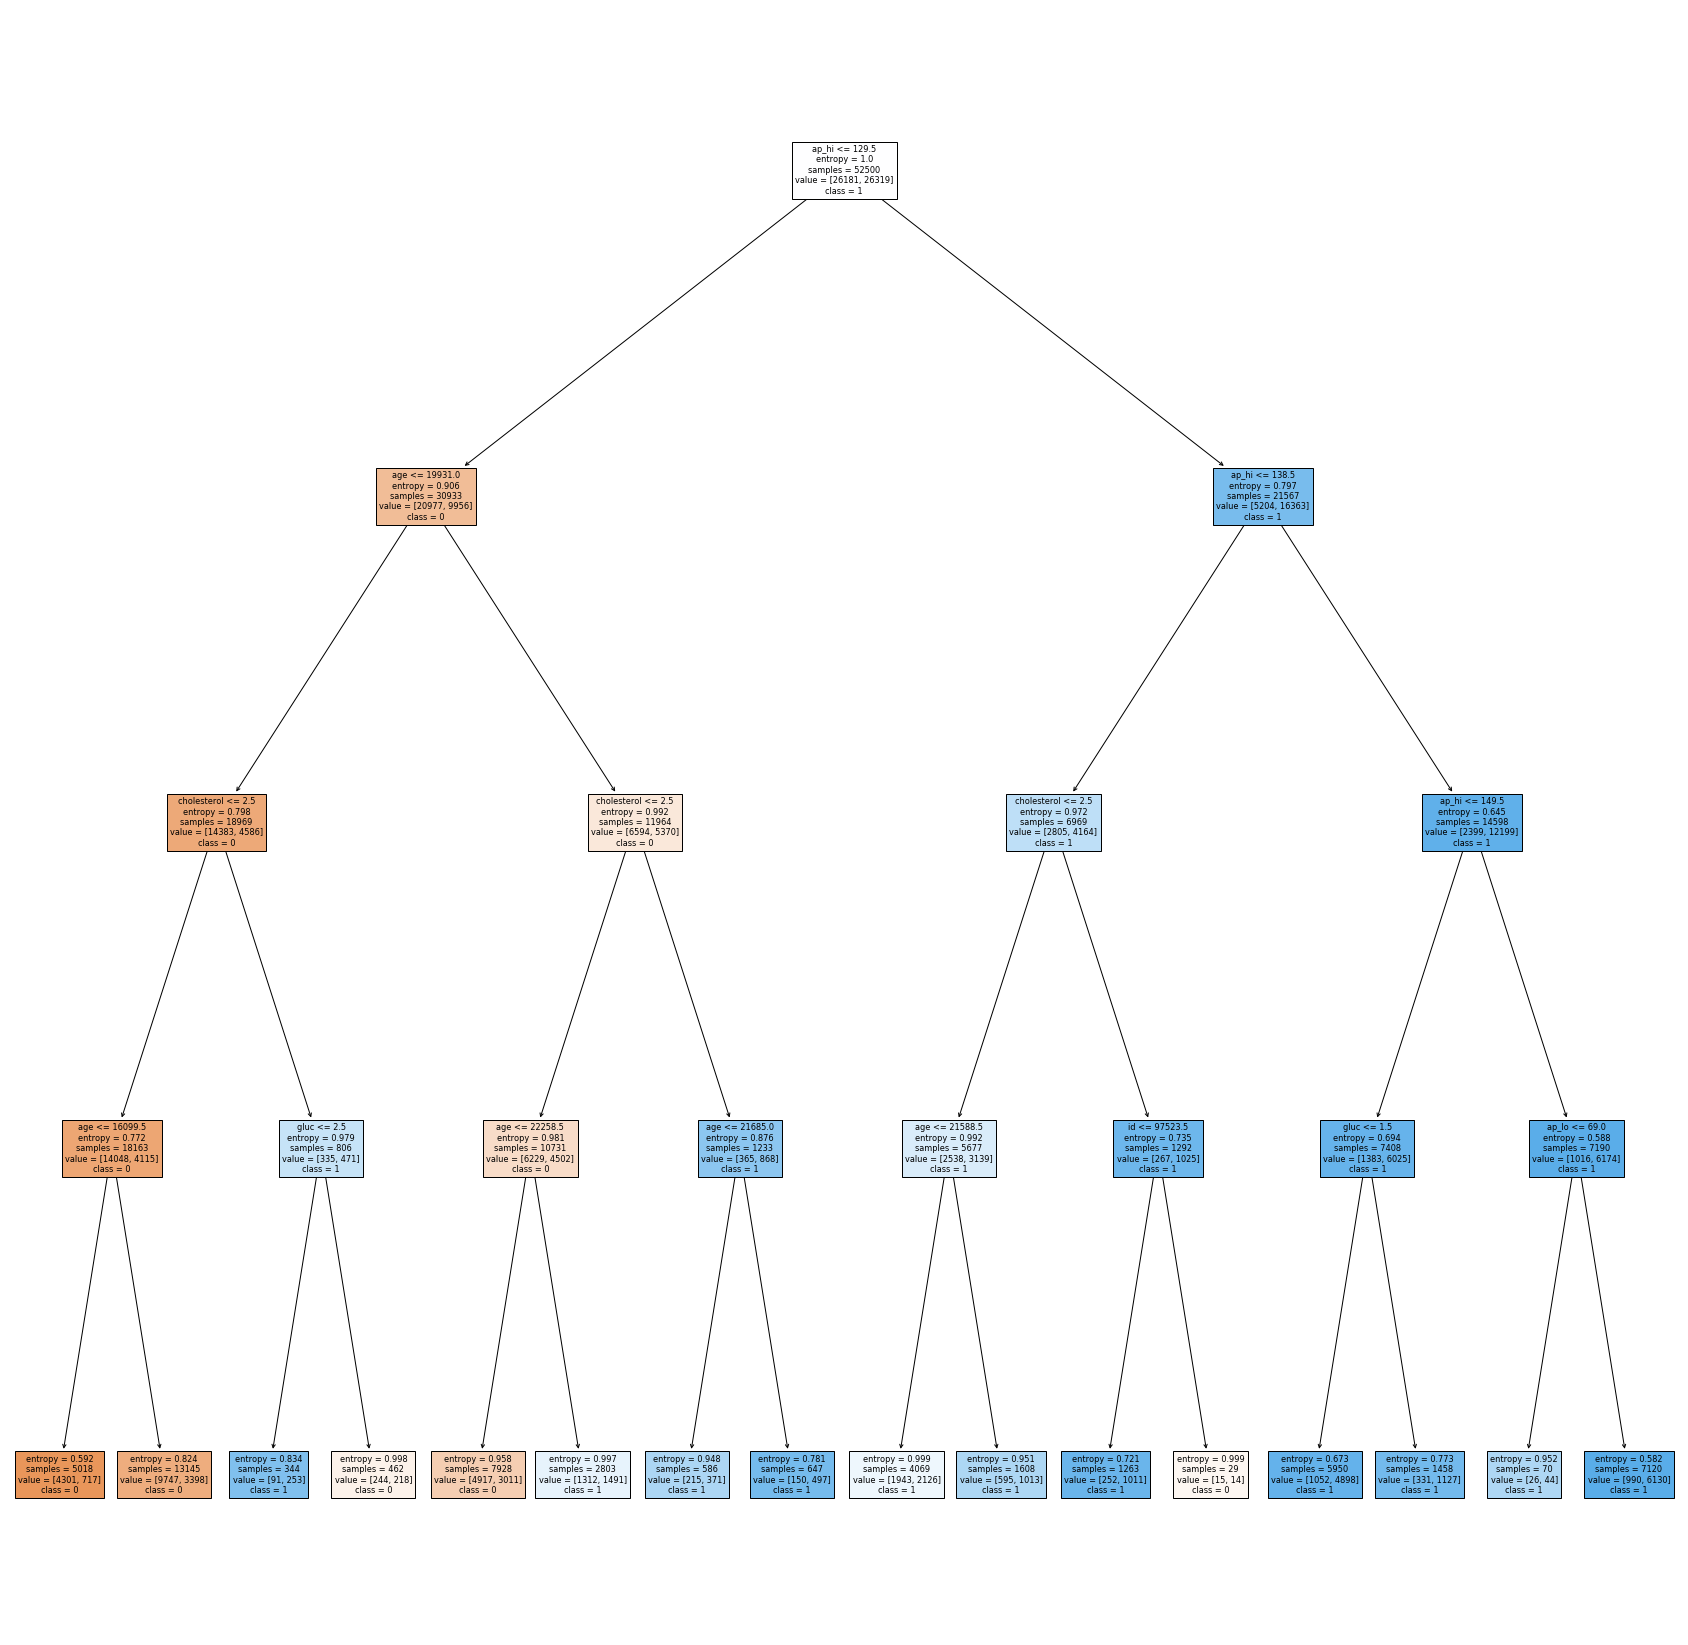

In [ ]:
# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
# create the classifer
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
# train the classifer
clf.fit(x_train,y_train)
# predict the test dataset
y_test_pred = clf.predict(x_test)
# visualize the tree
plt.figure(figsize=(30,30))
features = cardio_train.columns
classes = ['0','1']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
# create the classifer
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=4)
# train the classifer
clf.fit(x_train,y_train)
# predict the test dataset
y_test_pred = clf.predict(x_test)
# visualize the tree
plt.figure(figsize=(30,30))
features = cardio_train.columns
classes = ['0','1']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

## Interpret your results, compare gini and entropy. [1 points]


The accuracy of decision tree using gini and entropy as criterion is almost similar.
- Gini
```txt
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      8838
           1       0.73      0.72      0.72      8662

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500
```

- Entropy

```txt
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      8840
           1       0.77      0.68      0.72      8660

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500
```

## Compare the results of DT(gini), DT(entropy) and Naive Bayes. [2 points]

Comparing DT(gini with max_depth=6), DT(entropy with max_depth=6) and Navie Bayes.
- Gini
```txt
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      8838
           1       0.73      0.72      0.72      8662

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500
```

- Entropy
```txt
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      8840
           1       0.77      0.68      0.72      8660

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500
```

- Naive Bayes
```txt
              precision    recall  f1-score   support

           0       0.55      0.94      0.69      8840
           1       0.76      0.21      0.32      8660

    accuracy                           0.57     17500
   macro avg       0.65      0.57      0.51     17500
weighted avg       0.65      0.57      0.51     17500
```

The f1-score for decision tree using gini and entropy as criterion is greater compared to Naive Bayes f1-score. Hence Decision tree gives better results for this dataset compared to Navie Bayes.

## Visualize the dataset, for the target variable - 2 graphs [4 points]

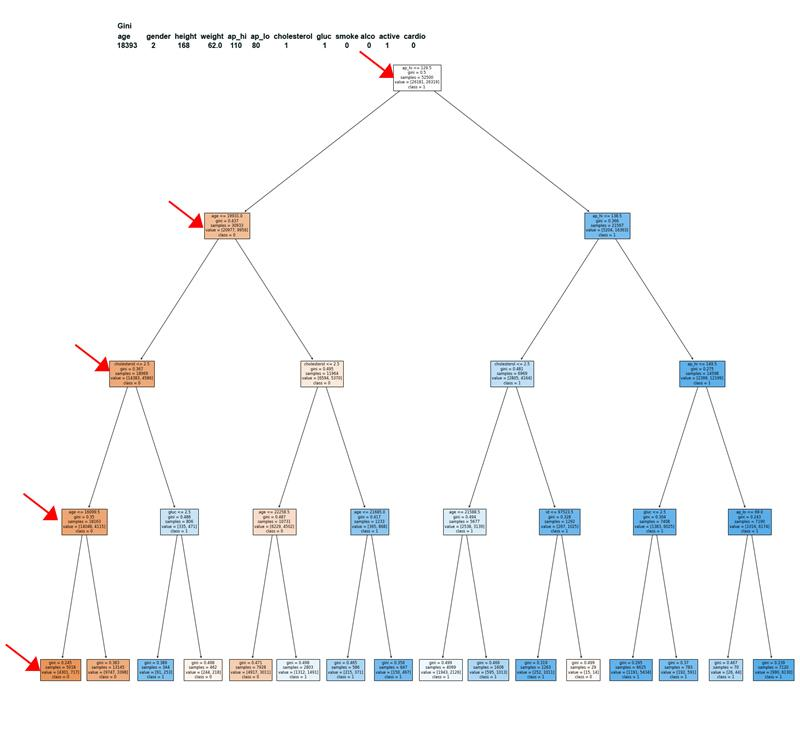

download-1.jpg

In [ ]:
#print(cardio_train.head())
# scatter plot for ap_hi and cholesterol
sns.set_style("whitegrid");
sns.FacetGrid(cardio_train, hue="cardio", height=4) \
.map(plt.scatter, "ap_hi", "cholesterol") \
.add_legend();
plt.show();

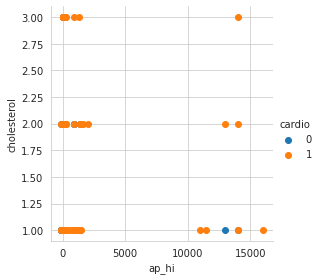

In [ ]:
# scatter plot for ap_hi and cholesterolsns.set_style("whitegrid");
sns.FacetGrid(cardio_train, hue="cardio", height=4) \
.map(plt.scatter, "height", "weight") \
.add_legend();
plt.show();



download-1.png